In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import load_img
from keras.models import load_model

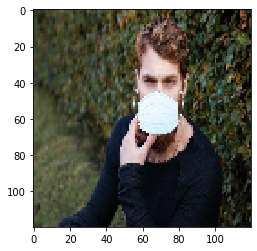

In [74]:
#Sample image
image = load_img("./dataset/with_mask/0-with-mask.jpg", target_size = (120, 120))
plt.imshow(image)
plt.show()

In [83]:
x_train = np.ndarray((1694, 150, 150, 3), dtype = "float32")
y = []
c = 0

In [84]:
#Loading the images and corresponding labels
path  = path = pathlib.Path("./dataset/with_mask")
for i in path.iterdir():
    image = load_img(str(i), target_size = (150, 150))
    image = np.asarray(image)
    x_train[c] = image
    c = c + 1
    y.append(1)

In [85]:
#Loading the images and corresponding labels
path  = path = pathlib.Path("./dataset/without_mask")
for i in path.iterdir():
    image = load_img(str(i), target_size = (150, 150)) 
    image = np.asarray(image)
    x_train[c] = image
    c = c + 1
    y.append(0)

In [86]:
x_train.shape, len(y)

((1694, 150, 150, 3), 1694)

In [87]:
y = np.array(y)
x_train.shape, y.shape

((1694, 150, 150, 3), (1694,))

In [88]:
X, y = shuffle(x_train, y, random_state = 17)

In [89]:
X = X / 255.0

In [90]:
X.shape, y.shape

((1694, 150, 150, 3), (1694,))

(<matplotlib.image.AxesImage at 0x7f03b42726a0>, 1)

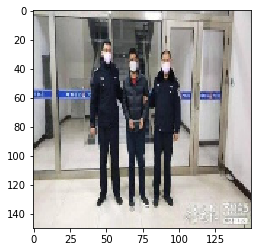

In [91]:
plt.imshow(X[1].squeeze(), cmap = "gray"), y[1]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [93]:
from sklearn.model_selection import train_test_split
X_test, X_validation, y_test, y_validation = train_test_split(X_validation, y_validation, test_size = 0.5, random_state = 1)

In [94]:
X_train.shape, X_validation.shape, X_test.shape, y_train.shape, y_validation.shape, y_test.shape

((1355, 150, 150, 3),
 (170, 150, 150, 3),
 (169, 150, 150, 3),
 (1355,),
 (170,),
 (169,))

In [95]:
import keras
number_cat = 2
y_train = keras.utils.to_categorical(y_train, number_cat)
y_validation = keras.utils.to_categorical(y_validation, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [96]:
X_train.shape, X_validation.shape, X_test.shape, y_train.shape, y_validation.shape, y_test.shape

((1355, 150, 150, 3),
 (170, 150, 150, 3),
 (169, 150, 150, 3),
 (1355, 2),
 (170, 2),
 (169, 2))

(<matplotlib.image.AxesImage at 0x7f03b40d67b8>,
 array([0., 1.], dtype=float32))

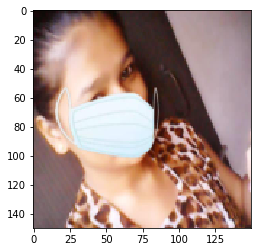

In [97]:
plt.imshow(X_train[1331].squeeze(), cmap = "gray"), y_train[0]

In [98]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator

In [109]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.33))

model.add(Flatten())

model.add(Dense(units = 256, activation = "relu"))

model.add(Dense(units = 512, activation = "relu"))
model.add(Dropout(0.33))

model.add(Dense(units = 1024, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 2, activation = "softmax"))

In [110]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 34, 34, 64)       

In [112]:
model.compile(loss = "categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate=0.001), metrics = ["accuracy"])

In [113]:
history = model.fit(X_train, y_train, epochs = 35, batch_size = 32 , validation_data = (X_validation, y_validation), verbose = 1)

Train on 1355 samples, validate on 170 samples
Epoch 1/35
1355/1355 [==============================] - 85s 63ms/step - loss: 0.6562 - accuracy: 0.5838 - val_loss: 0.6249 - val_accuracy: 0.6529
Epoch 2/35
1355/1355 [==============================] - 75s 56ms/step - loss: 0.3334 - accuracy: 0.8797 - val_loss: 0.2336 - val_accuracy: 0.9235
Epoch 3/35
1355/1355 [==============================] - 75s 55ms/step - loss: 0.1960 - accuracy: 0.9314 - val_loss: 0.1888 - val_accuracy: 0.9176
Epoch 4/35
1355/1355 [==============================] - 75s 56ms/step - loss: 0.2123 - accuracy: 0.9247 - val_loss: 0.1497 - val_accuracy: 0.9294
Epoch 5/35
1355/1355 [==============================] - 75s 56ms/step - loss: 0.1893 - accuracy: 0.9292 - val_loss: 0.2499 - val_accuracy: 0.9118
Epoch 6/35
1355/1355 [==============================] - 75s 55ms/step - loss: 0.2172 - accuracy: 0.9218 - val_loss: 0.1433 - val_accuracy: 0.9353
Epoch 7/35
1355/1355 [==============================] - 76s 56ms/step - loss:

In [115]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

<function matplotlib.pyplot.show(*args, **kw)>

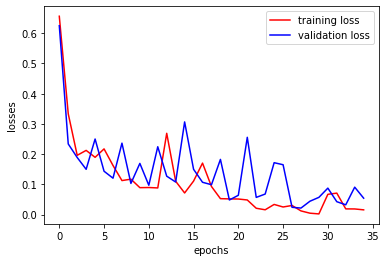

In [117]:
plt.plot(history.history['loss'], "r", label = "training loss")
plt.plot(history.history['val_loss'], "b", label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("losses")
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

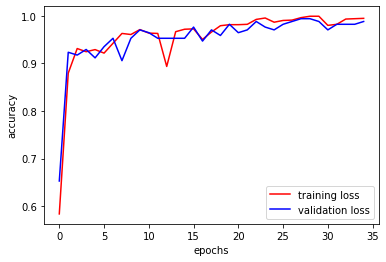

In [119]:
plt.plot(history.history['accuracy'], "r", label = "training loss")
plt.plot(history.history['val_accuracy'], "b", label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show

In [120]:
model.save("Model.h5")

In [122]:
evaluation = model.evaluate(X_test, y_test)
print("test accuracy: {}" .format(evaluation[1]))

169/169 [==============================] - 1s 8ms/step
test accuracy: 0.9585798978805542


In [124]:
predicted_class = model.predict_classes(X_test)
predicted_class

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [125]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [126]:
y_test = y_test.argmax(1)

In [127]:
y_test

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

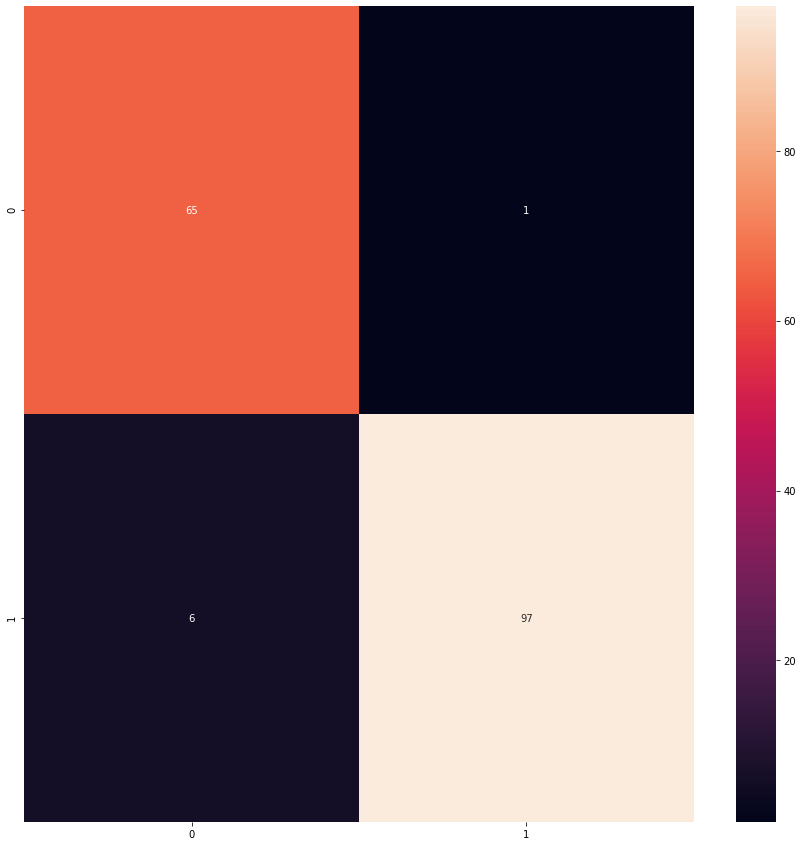

In [129]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_class)
cm
plt.figure(figsize  = (15, 15))
sns.heatmap(cm, annot = True)